<a href="https://colab.research.google.com/github/indhu68/AppliedML_Project/blob/main/AppliedML_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN Classifier - with 4 symbols per message and 100mw

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.35
Random Forest with Best Parameters Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.65      0.49       185
           1       0.24      0.32      0.28       188
           2       0.69      0.68      0.68       203
           3       0.20      0.06      0.10       223
           4       0.41      0.32      0.36       213
           5       0.32      0.41      0.36       187
           6       0.29      0.32      0.31       191
           7       0.24      0.25      0.25       216
           8       0.17      0.12      0.14       194

    accuracy                           0.34      1800
   macro avg       0.33      0.35      0.33      1800
weighted avg       0.33      0.34      0.33      1800



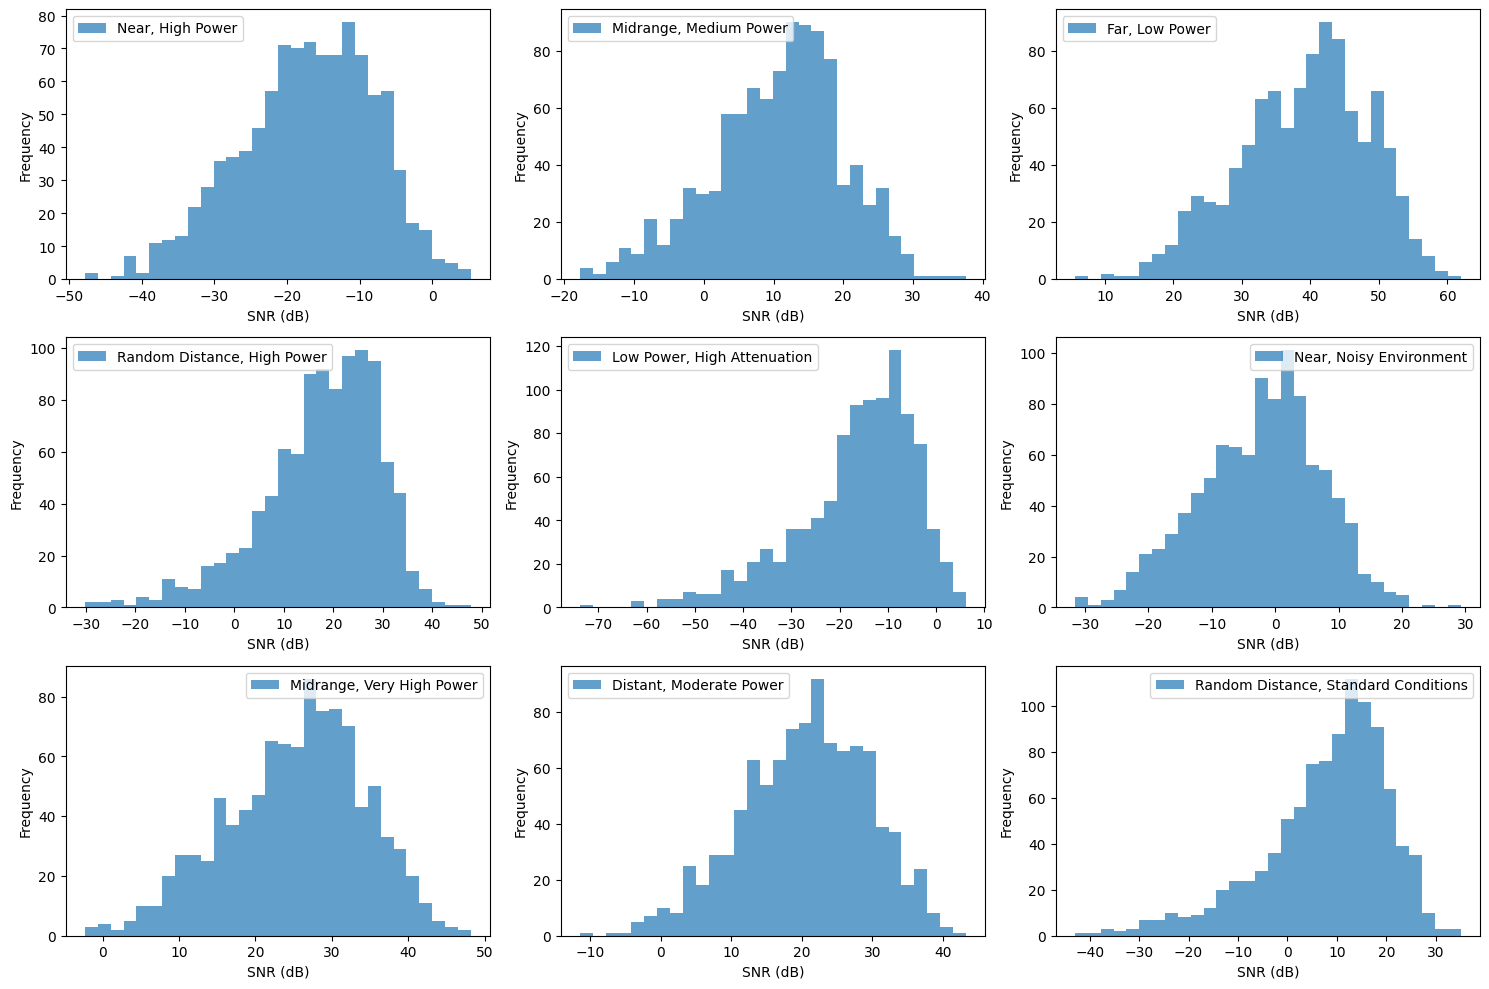

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

def calculate_snr(distance, lamda, PLE, power_dBm, noise_floor_dBm, shadowing_std, n):
    """Calculate the signal-to-noise ratio (SNR) for given parameters, considering n channel uses."""
    path_loss = 10 * np.log10(lamda / ((4 * np.pi * distance)**PLE))
    shadowing = np.random.normal(0, shadowing_std, len(distance)) * np.sqrt(n)  # Adjust shadowing based on n
    return power_dBm - path_loss + noise_floor_dBm + shadowing

# Constants
batch_size = 1000
k = 8  # Number of information bits per message
M = 2**k  # 256
lamda = 0.05  # Wavelength in meters
PLE = 2.8  # Path Loss Exponent
std_shadow = 3  # Standard deviation for log-normal shadowing
n = 4  # Number of real channel uses per message

# Parameters for nine different signals
parameters = [
    {'distance': np.random.uniform(1, 10, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -100, 'label': 'Near, High Power'},
    {'distance': np.random.uniform(10, 100, batch_size), 'power_dBm': 15, 'noise_floor_dBm': -95, 'label': 'Midrange, Medium Power'},
    {'distance': np.random.uniform(100, 1000, batch_size), 'power_dBm': 10, 'noise_floor_dBm': -90, 'label': 'Far, Low Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 25, 'noise_floor_dBm': -95, 'label': 'Random Distance, High Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 5, 'noise_floor_dBm': -110, 'label': 'Low Power, High Attenuation'},
    {'distance': np.random.uniform(1, 10, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -85, 'label': 'Near, Noisy Environment'},
    {'distance': np.random.uniform(10, 100, batch_size), 'power_dBm': 30, 'noise_floor_dBm': -95, 'label': 'Midrange, Very High Power'},
    {'distance': np.random.uniform(50, 500, batch_size), 'power_dBm': 10, 'noise_floor_dBm': -100, 'label': 'Distant, Moderate Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -100, 'label': 'Random Distance, Standard Conditions'}
]

# Generate data for each signal type
X = []
y = []
for i, param in enumerate(parameters):
    snrs = calculate_snr(param['distance'], lamda, PLE, param['power_dBm'], param['noise_floor_dBm'], std_shadow,n)
    X.extend(snrs)
    y.extend([i] * batch_size)  # Assign class label based on index

X = np.array(X).reshape(-1, 1)
y = np.array(y)


# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=12), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and best score from the grid search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator from grid search
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Classification report for the optimized model
print("Random Forest with Best Parameters Classification Report:\n", classification_report(y_test, y_pred_rf))

# Visualization of SNR distributions
plt.figure(figsize=(15, 10))
for i, param in enumerate(parameters):
    plt.subplot(3, 3, i+1)
    plt.hist(X[y == i], bins=30, alpha=0.7, label=f"{param['label']}")
    plt.xlabel('SNR (dB)')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()


RNN Classifier - with 8 symbols per message and 100mw

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.31
Random Forest with Best Parameters Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.52      0.46       210
           1       0.23      0.25      0.24       210
           2       0.57      0.58      0.58       216
           3       0.16      0.10      0.13       202
           4       0.30      0.26      0.28       192
           5       0.25      0.37      0.30       184
           6       0.23      0.25      0.24       192
           7       0.16      0.14      0.15       189
           8       0.21      0.15      0.18       205

    accuracy                           0.29      1800
   macro avg       0.28      0.29      0.28      1800
weighted avg       0.28      0.29      0.29      1800



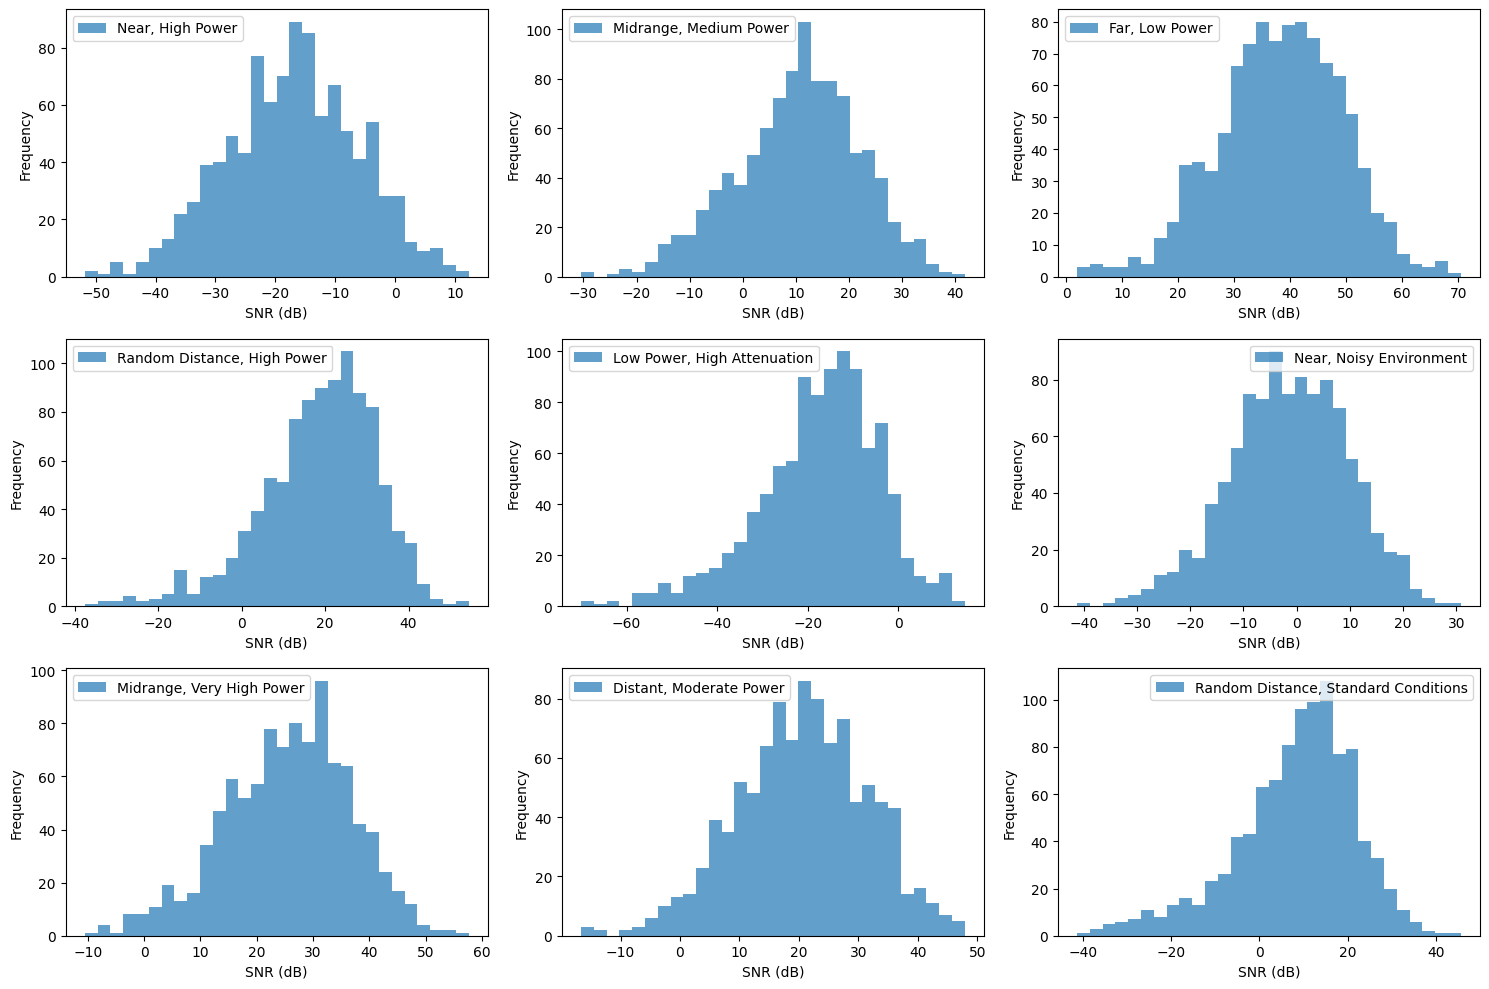

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

def calculate_snr(distance, lamda, PLE, power_dBm, noise_floor_dBm, shadowing_std, n):
    """Calculate the signal-to-noise ratio (SNR) for given parameters, considering n channel uses."""
    path_loss = 10 * np.log10(lamda / ((4 * np.pi * distance)**PLE))
    shadowing = np.random.normal(0, shadowing_std, len(distance)) * np.sqrt(n)  # Adjust shadowing based on n
    return power_dBm - path_loss + noise_floor_dBm + shadowing

# Constants
batch_size = 1000
k = 8  # Number of information bits per message
M = 2**k  # 256
lamda = 0.05  # Wavelength in meters
PLE = 2.8  # Path Loss Exponent
std_shadow = 3  # Standard deviation for log-normal shadowing
n = 8  # Number of real channel uses per message

# Parameters for nine different signals
parameters = [
    {'distance': np.random.uniform(1, 10, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -100, 'label': 'Near, High Power'},
    {'distance': np.random.uniform(10, 100, batch_size), 'power_dBm': 15, 'noise_floor_dBm': -95, 'label': 'Midrange, Medium Power'},
    {'distance': np.random.uniform(100, 1000, batch_size), 'power_dBm': 10, 'noise_floor_dBm': -90, 'label': 'Far, Low Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 25, 'noise_floor_dBm': -95, 'label': 'Random Distance, High Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 5, 'noise_floor_dBm': -110, 'label': 'Low Power, High Attenuation'},
    {'distance': np.random.uniform(1, 10, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -85, 'label': 'Near, Noisy Environment'},
    {'distance': np.random.uniform(10, 100, batch_size), 'power_dBm': 30, 'noise_floor_dBm': -95, 'label': 'Midrange, Very High Power'},
    {'distance': np.random.uniform(50, 500, batch_size), 'power_dBm': 10, 'noise_floor_dBm': -100, 'label': 'Distant, Moderate Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -100, 'label': 'Random Distance, Standard Conditions'}
]

# Generate data for each signal type
X = []
y = []
for i, param in enumerate(parameters):
    snrs = calculate_snr(param['distance'], lamda, PLE, param['power_dBm'], param['noise_floor_dBm'], std_shadow,n)
    X.extend(snrs)
    y.extend([i] * batch_size)  # Assign class label based on index

X = np.array(X).reshape(-1, 1)
y = np.array(y)


# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=2), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and best score from the grid search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator from grid search
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Classification report for the optimized model
print("Random Forest with Best Parameters Classification Report:\n", classification_report(y_test, y_pred_rf))

# Visualization of SNR distributions
plt.figure(figsize=(15, 10))
for i, param in enumerate(parameters):
    plt.subplot(3, 3, i+1)
    plt.hist(X[y == i], bins=30, alpha=0.7, label=f"{param['label']}")
    plt.xlabel('SNR (dB)')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()


RNN Regressor - with 4 symbols per message and 100mw

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score (R²): 0.65
Mean Squared Error: 14183.491603186334
Root Mean Squared Error: 119.09446504009468
R² Score: 0.6116741559178767


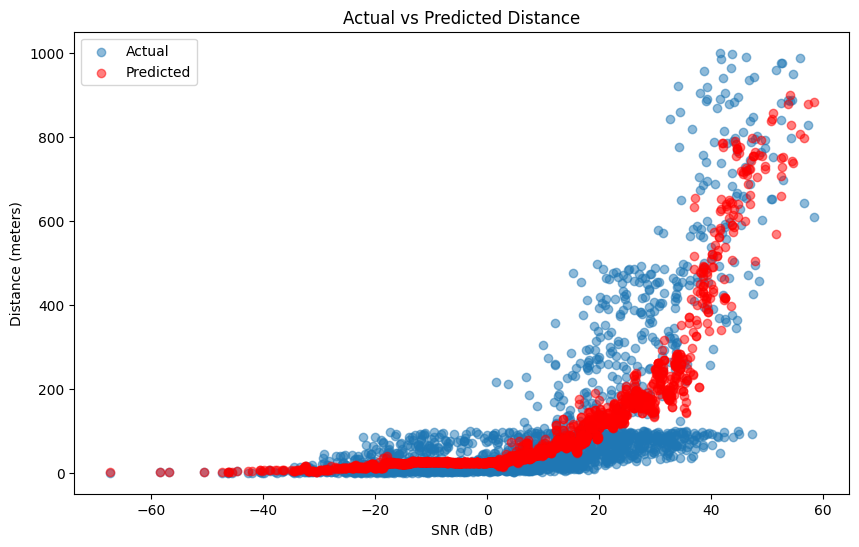

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

def calculate_snr(distance, lamda, PLE, power_dBm, noise_floor_dBm, shadowing_std, n):
    """Calculate the signal-to-noise ratio (SNR) for given parameters, considering n channel uses."""
    path_loss = 10 * np.log10(lamda / ((4 * np.pi * distance)**PLE))
    shadowing = np.random.normal(0, shadowing_std, len(distance)) * np.sqrt(n)  # Adjust shadowing based on n
    return power_dBm - path_loss + noise_floor_dBm + shadowing

# Constants
batch_size = 1000
k = 8  # Number of information bits per message
M = 2**k  # 256
lamda = 0.05  # Wavelength in meters
PLE = 2.8  # Path Loss Exponent
std_shadow = 3  # Standard deviation for log-normal shadowing
n = 4  # Number of real channel uses per message

# Parameters for nine different signals
parameters = [
    {'distance': np.random.uniform(1, 10, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -100, 'label': 'Near, High Power'},
    {'distance': np.random.uniform(10, 100, batch_size), 'power_dBm': 15, 'noise_floor_dBm': -95, 'label': 'Midrange, Medium Power'},
    {'distance': np.random.uniform(100, 1000, batch_size), 'power_dBm': 10, 'noise_floor_dBm': -90, 'label': 'Far, Low Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 25, 'noise_floor_dBm': -95, 'label': 'Random Distance, High Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 5, 'noise_floor_dBm': -110, 'label': 'Low Power, High Attenuation'},
    {'distance': np.random.uniform(1, 10, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -85, 'label': 'Near, Noisy Environment'},
    {'distance': np.random.uniform(10, 100, batch_size), 'power_dBm': 30, 'noise_floor_dBm': -95, 'label': 'Midrange, Very High Power'},
    {'distance': np.random.uniform(50, 500, batch_size), 'power_dBm': 10, 'noise_floor_dBm': -100, 'label': 'Distant, Moderate Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -100, 'label': 'Random Distance, Standard Conditions'}
]

# Generate data for each signal type
X = []
y = []
for i, param in enumerate(parameters):
    snrs = calculate_snr(param['distance'], lamda, PLE, param['power_dBm'], param['noise_floor_dBm'], std_shadow, n)
    X.extend(snrs)
    y.extend(param['distance'])  # Using distance as the target for regression

X = np.array(X).reshape(-1, 1)
y = np.array(y)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=12), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and best score from the grid search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (R²): {:.2f}".format(grid_search.best_score_))

# Using the best estimator from grid search
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Regression metrics
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2_score(y_test, y_pred_rf))

# Visualization of SNR vs. Distance
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.scatter(X_test, y_pred_rf, color='red', alpha=0.5, label='Predicted')
plt.xlabel('SNR (dB)')
plt.ylabel('Distance (meters)')
plt.title('Actual vs Predicted Distance')
plt.legend()
plt.show()


RNN Regressor - with 8 symbols per message and 100mw

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score (R²): 0.51
Mean Squared Error: 15921.630737563155
Root Mean Squared Error: 126.18094443125378
R² Score: 0.5336876237256589


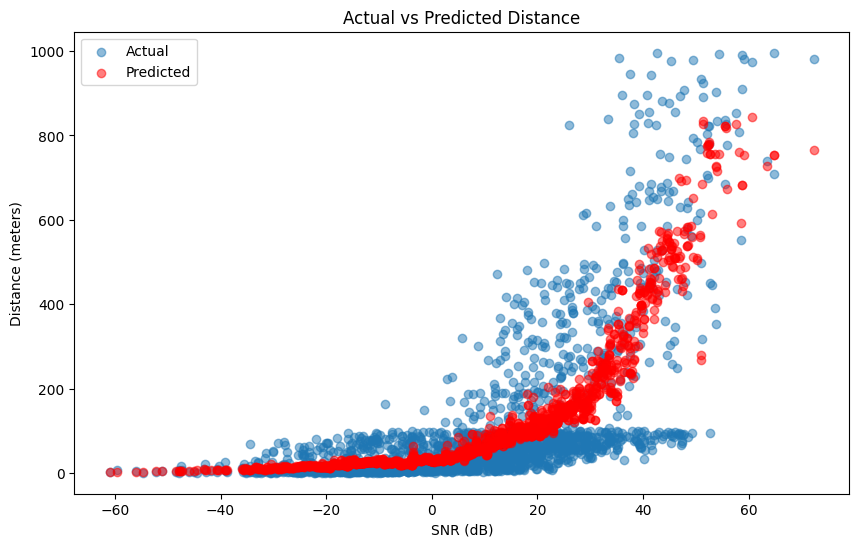

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

def calculate_snr(distance, lamda, PLE, power_dBm, noise_floor_dBm, shadowing_std, n):
    """Calculate the signal-to-noise ratio (SNR) for given parameters, considering n channel uses."""
    path_loss = 10 * np.log10(lamda / ((4 * np.pi * distance)**PLE))
    shadowing = np.random.normal(0, shadowing_std, len(distance)) * np.sqrt(n)  # Adjust shadowing based on n
    return power_dBm - path_loss + noise_floor_dBm + shadowing

# Constants
batch_size = 1000
k = 8  # Number of information bits per message
M = 2**k  # 256
lamda = 0.05  # Wavelength in meters
PLE = 2.8  # Path Loss Exponent
std_shadow = 3  # Standard deviation for log-normal shadowing
n = 8  # Number of real channel uses per message

# Parameters for nine different signals
parameters = [
    {'distance': np.random.uniform(1, 10, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -100, 'label': 'Near, High Power'},
    {'distance': np.random.uniform(10, 100, batch_size), 'power_dBm': 15, 'noise_floor_dBm': -95, 'label': 'Midrange, Medium Power'},
    {'distance': np.random.uniform(100, 1000, batch_size), 'power_dBm': 10, 'noise_floor_dBm': -90, 'label': 'Far, Low Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 25, 'noise_floor_dBm': -95, 'label': 'Random Distance, High Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 5, 'noise_floor_dBm': -110, 'label': 'Low Power, High Attenuation'},
    {'distance': np.random.uniform(1, 10, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -85, 'label': 'Near, Noisy Environment'},
    {'distance': np.random.uniform(10, 100, batch_size), 'power_dBm': 30, 'noise_floor_dBm': -95, 'label': 'Midrange, Very High Power'},
    {'distance': np.random.uniform(50, 500, batch_size), 'power_dBm': 10, 'noise_floor_dBm': -100, 'label': 'Distant, Moderate Power'},
    {'distance': np.random.uniform(1, 100, batch_size), 'power_dBm': 20, 'noise_floor_dBm': -100, 'label': 'Random Distance, Standard Conditions'}
]

# Generate data for each signal type
X = []
y = []
for i, param in enumerate(parameters):
    snrs = calculate_snr(param['distance'], lamda, PLE, param['power_dBm'], param['noise_floor_dBm'], std_shadow, n)
    X.extend(snrs)
    y.extend(param['distance'])  # Using distance as the target for regression

X = np.array(X).reshape(-1, 1)
y = np.array(y)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=12), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and best score from the grid search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (R²): {:.2f}".format(grid_search.best_score_))

# Using the best estimator from grid search
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Regression metrics
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2_score(y_test, y_pred_rf))

# Visualization of SNR vs. Distance
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.scatter(X_test, y_pred_rf, color='red', alpha=0.5, label='Predicted')
plt.xlabel('SNR (dB)')
plt.ylabel('Distance (meters)')
plt.title('Actual vs Predicted Distance')
plt.legend()
plt.show()
